In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning 

In [13]:
import pandas as pd
import glob
import os

# Define the relative path to the data folder
# Use the current working directory as a base for the relative path
current_dir = os.getcwd()  # Get the current working directory
folder_path = os.path.join(current_dir, '..', 'data')  # Adjust path to the 'data' folder

# Use glob to find all CSV files in the data folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Initialize an empty list to hold DataFrames
dataframes = []

# Define a common dtype for problematic columns (replace with actual column names as needed)
column_dtypes = {
    'ColumnName1': 'str',  # Example: Ensure this column is read as string
    'ColumnName2': 'float',  # Example: Ensure this column is read as float
    # Add other columns as needed
}

# Loop through each CSV file
for file in csv_files:
    try:
        # Read the CSV file into a DataFrame with specified dtypes
        df = pd.read_csv(file, dtype=column_dtypes, low_memory=False)
        print(f"Processing file: {file}")
        
        # Check if 'DIAG' column exists
        if 'DIAG' in df.columns:
            print(f"DIAG column found in file: {file}")
            # Filter rows where DIAG starts with 'J'
            filtered_df = df[df['DIAG'].str.startswith('J', na=False)]
            print(f"Rows matching filter in {file}: {len(filtered_df)}")
            # Append the filtered DataFrame to the list
            dataframes.append(filtered_df)
        else:
            print(f"Column 'DIAG' not found in file: {file}")
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all DataFrames in the list if any data was collected
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Save the combined DataFrame to a new CSV in the data folder
    output_path = os.path.join(folder_path, 'filtered_combined.csv')
    try:
        combined_df.to_csv(output_path, index=False)
        print(f"Filtered combined data saved successfully to {output_path}.")
    except Exception as e:
        print(f"Error saving the combined CSV: {e}")
    
    # Print a preview of the combined DataFrame
    print(combined_df.head())
else:
    print("No dataframes were created after filtering. Please check your input files.")


Processing file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021 2.csv
DIAG column found in file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021 2.csv
Rows matching filter in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021 2.csv: 28395
Processing file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/aqi_data.csv
Column 'DIAG' not found in file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/aqi_data.csv
Processing file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021.csv
DIAG column found in file: /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021.csv
Rows matching filter in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512

In [15]:
combined_df

,SEQ_NO,STAYTYPE,ZIPCODE3,AGEGROUP,SEX,AWEEKEND,DIS_YR,LOS,ADM_TYPE,ADM_SRC,STATUS,CHARGES1,PAYER1,DIAG,POA,PROC,ECODE,POAE
0,2021000011,1,983.0,3.0,M,1.0,2021,6.0,3,2,61.0,14000.0,1,J18,Y,NaN,NaN,NaN
1,2021000045,1,982.0,3.0,F,1.0,2021,3.0,3,9,1.0,10000.0,1,J96,Y,NaN,NaN,NaN
2,2021000127,1,982.0,3.0,F,0.0,2021,2.0,3,6,7.0,17000.0,1,J69,Y,NaN,NaN,NaN
3,2021000148,1,982.0,3.0,M,0.0,2021,7.0,1,6,6.0,22000.0,1,J18,Y,NaN,NaN,NaN
4,2021000518,1,982.0,3.0,M,0.0,2021,2.0,1,2,50.0,14000.0,1,J96,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710325,2016756100,2,980,NaN,M,NaN,2016,NaN,3,1,1.0,17000.0,1,J90,NaN,NaN,NaN,NaN
1710326,2016756102,2,980,NaN,M,NaN,2016,NaN,2,1,1.0,17000.0,1,J20,NaN,NaN,NaN,NaN
1710327,2016756133,2,111,NaN,M,NaN,2016,NaN,1,1,1.0,18000.0,1,J09,NaN,NaN,NaN,NaN
1710328,2016756141,2,980,NaN,F,NaN,2016,NaN,2,1,1.0,5000.0,1,J18,NaN,NaN,NaN,NaN


In [14]:
for file in csv_files:
    df = pd.read_csv(file, low_memory=False)
    print(f"Columns in {file}: {df.columns.tolist()}")


Columns in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021 2.csv: ['SEQ_NO', 'STAYTYPE', 'ZIPCODE3', 'AGEGROUP', 'SEX', 'AWEEKEND', 'DIS_YR', 'LOS', 'ADM_TYPE', 'ADM_SRC', 'STATUS', 'CHARGES1', 'PAYER1', 'DIAG', 'POA', 'PROC', 'ECODE', 'POAE']
Columns in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/aqi_data.csv: ['Year', 'mean_AQI']
Columns in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2021.csv: ['SEQ_NO', 'STAYTYPE', 'ZIPCODE3', 'AGEGROUP', 'SEX', 'AWEEKEND', 'DIS_YR', 'LOS', 'ADM_TYPE', 'ADM_SRC', 'STATUS', 'CHARGES1', 'PAYER1', 'DIAG', 'POA', 'PROC', 'ECODE', 'POAE']
Columns in /Users/salahelbakri/Desktop/512_human_centered_design/part_1/data_512_part1/src/../data/puds_zip_2020.csv: ['SEQ_NO', 'STAYTYPE', 'ZIPCODE3', 'AGEGROUP', 'SEX', 'AWEEKEND', 'DIS_YR', 'LOS', 'ADM_TYPE', 'ADM_SRC', 'STATUS', 'CHARGES1', 'PAYER1', 'DIAG', 'POA', '

In [16]:
# uncomment to read directly from csv  
#combined_df = pd.read_csv('/Users/salahelbakri/Downloads/data/filtered_combined.csv', index=False)

In [17]:
# Define the list of relevant ICD-10 codes
respiratory_icd10_codes = [
    "J18", "J43", "J44", "J45", "J47", "J69", "J96", 
    "J40", "J20", "J41", "J42", "J68"
]

# Filter the hospital data to include only rows with these ICD-10 codes
filtered_hospital_data = combined_df[combined_df['DIAG'].isin(respiratory_icd10_codes)]

# Display the first few rows of the filtered dataset
filtered_hospital_data


,SEQ_NO,STAYTYPE,ZIPCODE3,AGEGROUP,SEX,AWEEKEND,DIS_YR,LOS,ADM_TYPE,ADM_SRC,STATUS,CHARGES1,PAYER1,DIAG,POA,PROC,ECODE,POAE
0,2021000011,1,983.0,3.0,M,1.0,2021,6.0,3,2,61.0,14000.0,1,J18,Y,NaN,NaN,NaN
1,2021000045,1,982.0,3.0,F,1.0,2021,3.0,3,9,1.0,10000.0,1,J96,Y,NaN,NaN,NaN
2,2021000127,1,982.0,3.0,F,0.0,2021,2.0,3,6,7.0,17000.0,1,J69,Y,NaN,NaN,NaN
3,2021000148,1,982.0,3.0,M,0.0,2021,7.0,1,6,6.0,22000.0,1,J18,Y,NaN,NaN,NaN
4,2021000518,1,982.0,3.0,M,0.0,2021,2.0,1,2,50.0,14000.0,1,J96,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710322,2016756045,2,980,NaN,F,NaN,2016,NaN,1,1,1.0,26000.0,1,J96,NaN,NaN,NaN,NaN
1710323,2016756064,2,980,NaN,F,NaN,2016,NaN,1,1,1.0,18000.0,9,J18,NaN,NaN,NaN,NaN
1710324,2016756086,2,981,NaN,M,NaN,2016,NaN,2,1,1.0,10000.0,4,J18,NaN,NaN,NaN,NaN
1710326,2016756102,2,980,NaN,M,NaN,2016,NaN,2,1,1.0,17000.0,1,J20,NaN,NaN,NaN,NaN


In [3]:
# Get all unique ZIP codes in the 'ZIPCODE3' column
unique_zip_codes = combined_df['ZIPCODE3'].unique()

# Display the unique ZIP codes
print(unique_zip_codes)


[983.0 982.0 989.0 111.0 994.0 985.0 988.0 991.0 986.0 981.0 980.0 984.0
 990.0 992.0 993.0 '000' '111' '980' '981' '982' '983' '984' '985' '986'
 '988' '989' 'Other' '992' '993' '983.0' '982.0' '989.0' '111.0' '994.0'
 '985.0' '988.0' '991.0' '986.0' '981.0' '980.0' '984.0' '990.0' '992.0'
 '993.0']


In [5]:
print(combined_df['DIS_YR'].unique())  


[2021 2020 2022 2023 2018 2019 2015 2017 2016]


In [6]:
df_fire = pd.read_csv("/Users/salahelbakri/Downloads/data/fire/df_renton_fires.csv")

/var/folders/p8/09r2qr956s5d5st07s90ws340000gn/T/ipykernel_66439/166092611.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fire = pd.read_csv("/Users/salahelbakri/Downloads/data/fire/df_renton_fires.csv")


In [66]:
# Filter the df_fire dataset where shortest_distance_to_city <= 650
df_fire_filtered = df_fire[df_fire['shortest_distance_to_city'] <= 650]
df_fire_filtered


,attributes_OBJECTID,attributes_USGS_Assigned_ID,attributes_Assigned_Fire_Type,attributes_Fire_Year,attributes_Fire_Polygon_Tier,attributes_Fire_Attribute_Tiers,attributes_GIS_Acres,attributes_GIS_Hectares,attributes_Source_Datasets,attributes_Listed_Fire_Types,...,attributes_Overlap_Within_1_or_2_Flag,attributes_Circleness_Scale,attributes_Circle_Flag,attributes_Exclude_From_Summary_Rasters,attributes_Shape_Length,attributes_Shape_Area,geometry_rings,geometry_curveRings,fire_season_discovery_dates,shortest_distance_to_city
0,13526,13526,Wildfire,1961,1,"1 (4), 3 (6)",55249.740141,22358.776573,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (8), Likely Wildfire (2)",...,NaN,0.398775,NaN,No,83939.248629,2.235878e+08,"[[[-2051345.980799999, 326515.43930000067], [-...",NaN,['1961-09-08'],490.720867
2,13528,13528,Wildfire,1961,1,"1 (4), 3 (6)",34233.698603,13853.886306,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (8), Likely Wildfire (2)",...,NaN,0.320032,NaN,No,73755.413582,1.385389e+08,"[[[-2010119.557, 86591.88869999908], [-2009750...",NaN,['1961-09-02'],624.253460
4,13530,13530,Wildfire,1961,1,"1 (1), 3 (2)",27269.045936,11035.391368,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",...,NaN,0.433246,NaN,No,56575.916692,1.103539e+08,"[[[-1710951.5197, 804262.8731999993], [-171091...",NaN,['1961-09-01'],216.719891
5,13533,13533,Wildfire,1961,1,"1 (1), 3 (3)",13511.581889,5467.943194,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (2)",...,NaN,0.408935,NaN,No,40991.098726,5.467943e+07,"[[[-1362484.6517999992, 774572.5963000003], [-...",NaN,['1961-07-24'],381.623168
6,13534,13534,Wildfire,1961,1,"1 (2), 3 (3)",13003.054360,5262.149405,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (4), Likely Wildfire (1)",...,NaN,0.253816,NaN,No,51041.952101,5.262149e+07,"[[[-1904232.8567999993, 331666.2535999995], [-...",NaN,['1961-08-02'],475.063344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43512,97201,97201,Wildfire,2020,3,3 (4),0.025582,0.010353,Comb_National_NIFC_Wildland_Fire_Perimeters_FH...,"Wildfire (2), Likely Wildfire (2)",...,NaN,0.650512,NaN,No,44.719967,1.035257e+02,"[[[-1699529.8399, 304855.32389999926], [-16995...",NaN,['2020-07-16'],505.157681
43515,97225,97225,Wildfire,2020,3,3 (4),0.019341,0.007827,"Comb_National_NIFC_Public_NIFS_Perimeters (1),...","Wildfire (2), Likely Wildfire (2)",...,NaN,0.471547,NaN,No,45.671283,7.827111e+01,"[[[-1703669.1873000003, 316857.1609000005], [-...",NaN,['2020-07-21'],497.589594
43516,97227,97227,Wildfire,2020,3,3 (4),0.018916,0.007655,"Comb_State_BLM_Nevada_FPER (1), Comb_National_...","Likely Wildfire (2), Wildfire (2)",...,NaN,0.751712,NaN,No,35.772540,7.654927e+01,"[[[-1620263.0033, 258382.68170000054], [-16202...",NaN,['2020-07-17'],545.972076
43520,97288,97288,Wildfire,2020,3,3 (4),0.008162,0.003303,"Comb_National_BLM_Fire_Perimeters_LADP (1), Co...",Wildfire (4),...,NaN,0.588362,NaN,No,26.560743,3.303052e+01,"[[[-1635768.7281999998, 258178.54309999943], [...",NaN,['2020-08-21'],543.022594


In [9]:
# Filter for ZIP codes that start with 98
filtered_df = combined_df[combined_df['ZIPCODE3'].astype(str).str.startswith('98')]

# Display the filtered DataFrame
filtered_df


,SEQ_NO,STAYTYPE,ZIPCODE3,AGEGROUP,SEX,AWEEKEND,DIS_YR,LOS,ADM_TYPE,ADM_SRC,STATUS,CHARGES1,PAYER1,DIAG,POA,PROC,ECODE,POAE
0,2021000011,1,983.0,3.0,M,1.0,2021,6.0,3,2,61.0,14000.0,1,J18,Y,NaN,NaN,NaN
1,2021000045,1,982.0,3.0,F,1.0,2021,3.0,3,9,1.0,10000.0,1,J96,Y,NaN,NaN,NaN
2,2021000127,1,982.0,3.0,F,0.0,2021,2.0,3,6,7.0,17000.0,1,J69,Y,NaN,NaN,NaN
3,2021000148,1,982.0,3.0,M,0.0,2021,7.0,1,6,6.0,22000.0,1,J18,Y,NaN,NaN,NaN
4,2021000518,1,982.0,3.0,M,0.0,2021,2.0,1,2,50.0,14000.0,1,J96,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345542,2016756086,2,981,NaN,M,NaN,2016,NaN,2,1,1.0,10000.0,4,J18,NaN,NaN,NaN,NaN
1345543,2016756100,2,980,NaN,M,NaN,2016,NaN,3,1,1.0,17000.0,1,J90,NaN,NaN,NaN,NaN
1345544,2016756102,2,980,NaN,M,NaN,2016,NaN,2,1,1.0,17000.0,1,J20,NaN,NaN,NaN,NaN
1345546,2016756141,2,980,NaN,F,NaN,2016,NaN,2,1,1.0,5000.0,1,J18,NaN,NaN,NaN,NaN


In [79]:
# 1. Data Cleaning and Preparation

# --- Fires Data (df_fire) ---
# Filter relevant columns and handle missing values
# Keep fires within 650 miles
fires_data = df_fire[['attributes_Fire_Year', 'attributes_GIS_Acres', 'shortest_distance_to_city']].copy()
fires_data = fires_data[fires_data['shortest_distance_to_city'] <= 650]

# Aggregate fire data by year (count number of fires)
fires_data_aggregated = fires_data.groupby('attributes_Fire_Year').size().reset_index(name='Fire_Count')
fires_data_aggregated.rename(columns={'attributes_Fire_Year': 'Year'}, inplace=True)

# --- Hospital Visits Data (filtered_hospital_data) ---
filtered_hospital_data = filtered_hospital_data[filtered_hospital_data['ZIPCODE3'].astype(str).str.startswith('98')]
hospital_data = filtered_hospital_data.copy()

# Aggregate hospital data by year
hospital_data_aggregated = hospital_data.groupby('DIS_YR')['SEQ_NO'].count().reset_index()
hospital_data_aggregated.rename(columns={'DIS_YR': 'Year', 'SEQ_NO': 'Respiratory_Visits'}, inplace=True)

# 2. EDA: Trends Between Fires and Hospital Visits

# Merge aggregated data on year
combined_data = pd.merge(fires_data_aggregated, hospital_data_aggregated, on='Year', how='inner')
"""
# Line Chart Visualization
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Fire_Count'], label='Number of Fires', marker='o', color='red')
plt.plot(combined_data['Year'], combined_data['Respiratory_Visits'], label='Respiratory Visits', marker='o', color='blue')
plt.title('Trends Between Number of Fires and Respiratory Visits Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

hospital_data_aggregated
"""

"\n# Line Chart Visualization\nplt.figure(figsize=(12, 6))\nplt.plot(combined_data['Year'], combined_data['Fire_Count'], label='Number of Fires', marker='o', color='red')\nplt.plot(combined_data['Year'], combined_data['Respiratory_Visits'], label='Respiratory Visits', marker='o', color='blue')\nplt.title('Trends Between Number of Fires and Respiratory Visits Over Time')\nplt.xlabel('Year')\nplt.ylabel('Count')\nplt.legend()\nplt.grid()\nplt.show()\n\nhospital_data_aggregated\n"

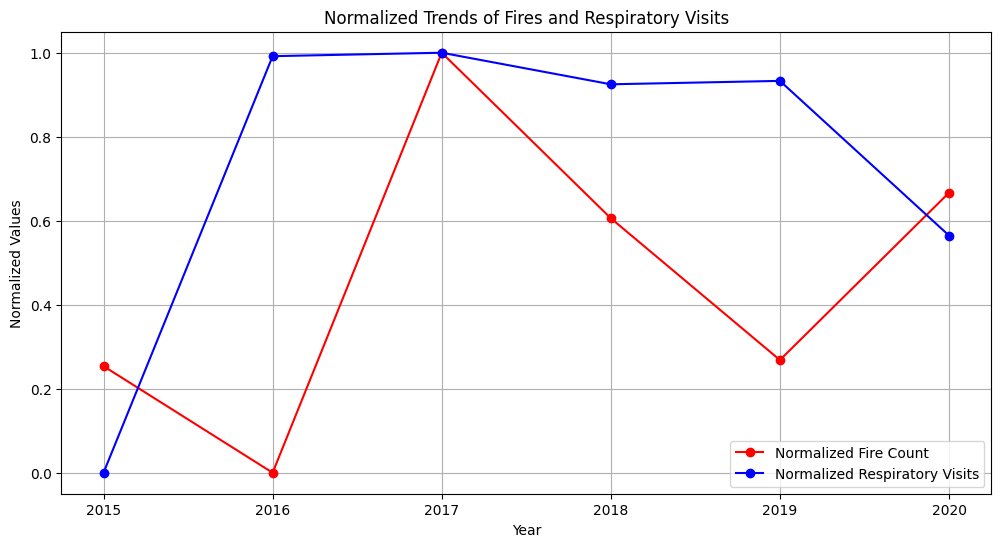

In [80]:
# Min-Max Normalization
combined_data['Fire_Count_Norm'] = (combined_data['Fire_Count'] - combined_data['Fire_Count'].min()) / (combined_data['Fire_Count'].max() - combined_data['Fire_Count'].min())
combined_data['Respiratory_Visits_Norm'] = (combined_data['Respiratory_Visits'] - combined_data['Respiratory_Visits'].min()) / (combined_data['Respiratory_Visits'].max() - combined_data['Respiratory_Visits'].min())

# Plot normalized data
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Fire_Count_Norm'], label='Normalized Fire Count', marker='o', color='red')
plt.plot(combined_data['Year'], combined_data['Respiratory_Visits_Norm'], label='Normalized Respiratory Visits', marker='o', color='blue')
plt.title('Normalized Trends of Fires and Respiratory Visits')
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid()
plt.show()


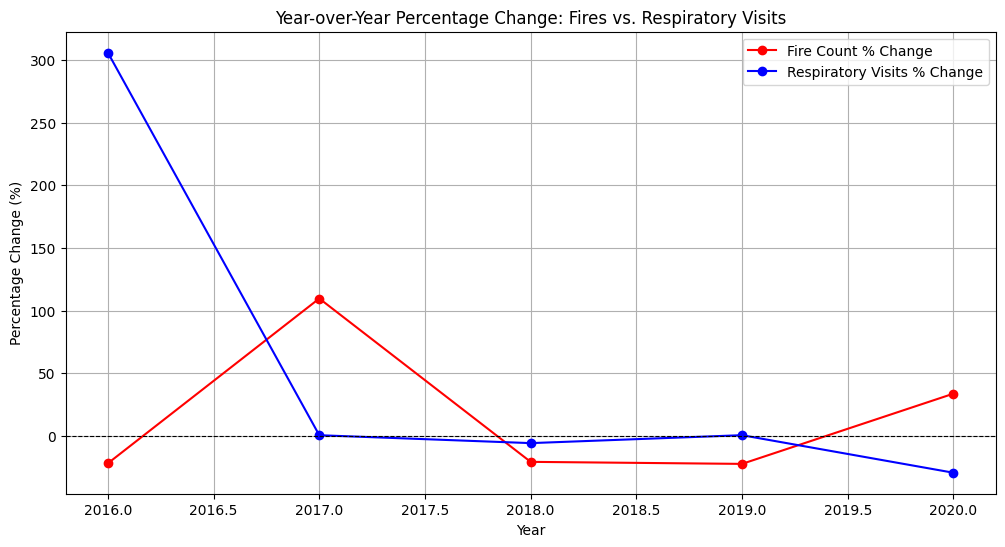

In [83]:
combined_data['Fire_Count_Pct_Change'] = combined_data['Fire_Count'].pct_change() * 100
combined_data['Respiratory_Visits_Pct_Change'] = combined_data['Respiratory_Visits'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Fire_Count_Pct_Change'], label='Fire Count % Change', marker='o', color='red')
plt.plot(combined_data['Year'], combined_data['Respiratory_Visits_Pct_Change'], label='Respiratory Visits % Change', marker='o', color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Year-over-Year Percentage Change: Fires vs. Respiratory Visits')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid()
plt.show()

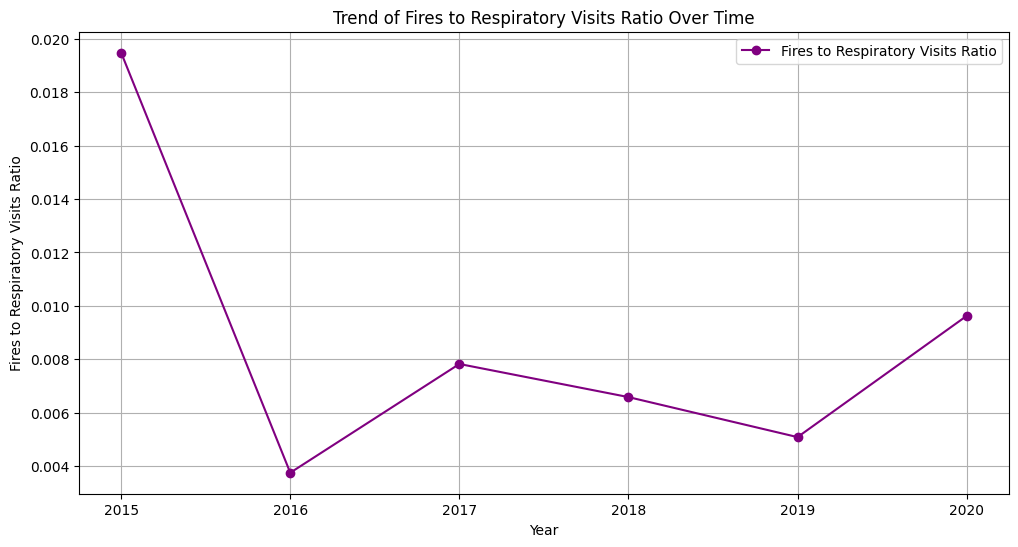

In [84]:
combined_data['Fires_to_Visits_Ratio'] = combined_data['Fire_Count'] / combined_data['Respiratory_Visits']

plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Fires_to_Visits_Ratio'], label='Fires to Respiratory Visits Ratio', marker='o', color='purple')
plt.title('Trend of Fires to Respiratory Visits Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Fires to Respiratory Visits Ratio')
plt.legend()
plt.grid()
plt.show()


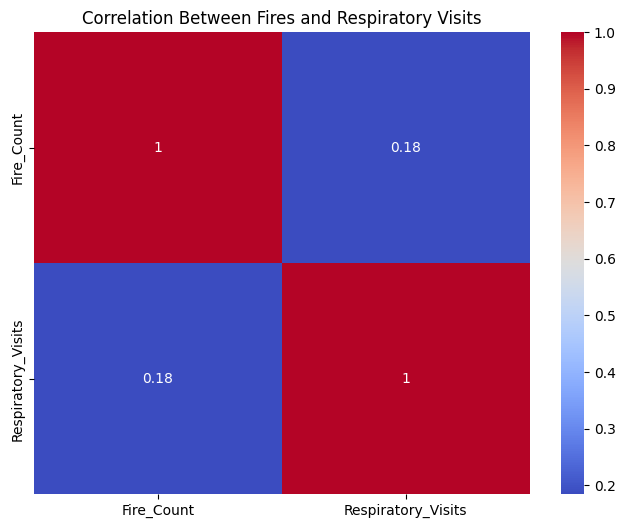

In [85]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(combined_data[['Fire_Count', 'Respiratory_Visits']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Fires and Respiratory Visits')
plt.show()


### initial exploration

       attributes_Fire_Year  shortest_distance_to_city  attributes_GIS_Acres
35744                  2016                 402.718517         193877.081658
35745                  2016                 111.254516         177802.479932
35746                  2016                 781.172685         132157.348285
35747                  2016                 507.077476         122390.233325
35748                  2016                1734.397726          58574.486186


<Axes: title={'center': 'Wildfires vs. Hospital Visits by Year'}>

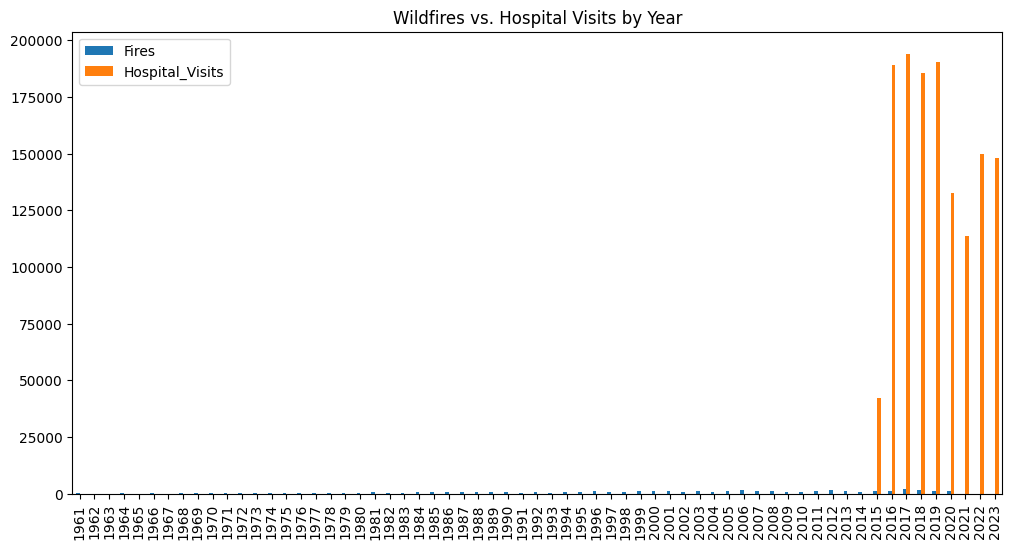

In [11]:
"""# Filter wildfires by year (2016-2023)
df_fire_filtered = df_fire[(df_fire['attributes_Fire_Year'] >= 2016) & (df_fire['attributes_Fire_Year'] <= 2023)]

# Print a preview to confirm filtering
print(df_fire_filtered[['attributes_Fire_Year', 'shortest_distance_to_city', 'attributes_GIS_Acres']].head())

# Extract fire years and count fires by year
fire_counts_by_year = df_fire['attributes_Fire_Year'].value_counts().sort_index()

# Group hospital visits by year
hospital_visits_by_year = combined_df.groupby('DIS_YR').size()

# Merge and visualize
comparison_df = pd.DataFrame({'Fires': fire_counts_by_year, 'Hospital_Visits': hospital_visits_by_year}).fillna(0)

comparison_df.plot(kind='bar', figsize=(12, 6), title="Wildfires vs. Hospital Visits by Year")

"""

In [89]:
# Aggregate respiratory visits by year
respiratory_visits_by_year = filtered_hospital_data.groupby('DIS_YR').size()

# Count fires by year
fire_counts_by_year = df_fire_filtered['attributes_Fire_Year'].value_counts().sort_index()

# Combine respiratory visits and fire counts into a single DataFrame
# Use an inner join to include only years present in both datasets
combined_data = pd.DataFrame({
    'Respiratory_Visits': respiratory_visits_by_year,
}).join(
    pd.DataFrame({'Fires_Near_Renton': fire_counts_by_year}), 
    how='inner'
)

# Calculate correlation
correlation = combined_data.corr()
print("Correlation between Fires and Respiratory Visits:\n", correlation)

# Optional: Display the combined data
print("\nCombined Data:")
print(combined_data)


Correlation between Fires and Respiratory Visits:
                     Respiratory_Visits  Fires_Near_Renton
Respiratory_Visits            1.000000           0.184689
Fires_Near_Renton             0.184689           1.000000

Combined Data:
      Respiratory_Visits  Fires_Near_Renton
2015               28552                556
2016              115824                435
2017              116548                912
2018              109932                724
2019              110648                563
2020               78248                753


Number of Fires by Year:
attributes_Fire_Year
1961    143
1962     61
1963     48
1964     89
1965     41
1966     83
1967     48
1968     93
1969     49
1970     82
1971    109
1972    146
1973    173
1974     87
1975     81
1976     99
1977     99
1978     89
1979    121
1980    226
1981    348
1982    182
1983    274
1984    307
1985    437
1986    422
1987    398
1988    306
1989    259
1990    262
1991    240
1992    379
1993     81
1994    420
1995    249
1996    534
1997    208
1998    305
1999    547
2000    549
2001    591
2002    358
2003    453
2004    233
2005    401
2006    678
2007    652
2008    484
2009    320
2010    340
2011    471
2012    635
2013    564
2014    452
2015    556
2016    435
2017    912
2018    724
2019    563
2020    753
dtype: int64

Number of Hospital Visits by Year:
DIS_YR
2015     28552
2016    115824
2017    116548
2018    109932
2019    110648
2020     78248
2021     69208
2022     69784
2023     72340
dtype: int64

Combined DataFrame for Compar

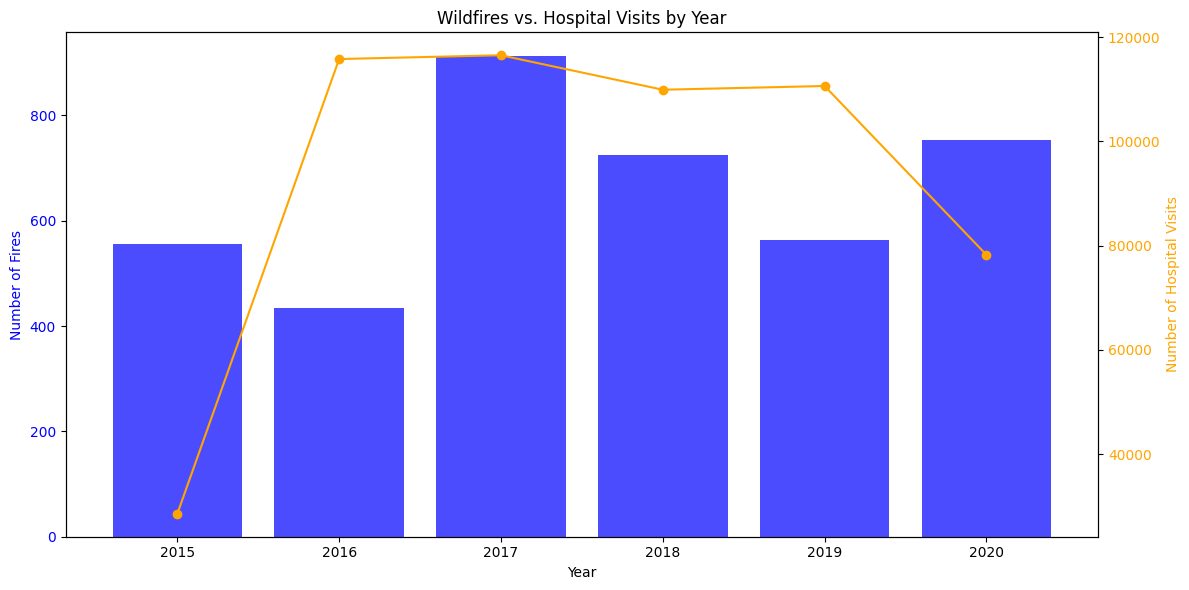

In [93]:
# Count fires by year
fire_counts_by_year = df_fire_filtered.groupby('attributes_Fire_Year').size()

# Group and count hospital visits by year
hospital_visits_by_year = filtered_hospital_data.groupby('DIS_YR').size()

# Combine data into a single DataFrame, ensuring alignment of indices
comparison_df = pd.DataFrame({
    'Fires': fire_counts_by_year,
    'Hospital_Visits': hospital_visits_by_year
}).dropna()  # Drop rows where either column has missing values

# Verify the counts
print("Number of Fires by Year:")
print(fire_counts_by_year)
print("\nNumber of Hospital Visits by Year:")
print(hospital_visits_by_year)
print("\nCombined DataFrame for Comparison:")
print(comparison_df)

# Plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fires on the primary y-axis
ax1.bar(comparison_df.index, comparison_df['Fires'], color='blue', alpha=0.7, label='Fires')
ax1.set_ylabel('Number of Fires', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Year')

# Plot Hospital Visits on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Hospital_Visits'], color='orange', marker='o', label='Hospital Visits')
ax2.set_ylabel('Number of Hospital Visits', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title("Wildfires vs. Hospital Visits by Year")
fig.tight_layout()

# Show the plot
plt.show()


In [94]:
comparison_df

,Fires,Hospital_Visits
2015,556.0,28552.0
2016,435.0,115824.0
2017,912.0,116548.0
2018,724.0,109932.0
2019,563.0,110648.0
2020,753.0,78248.0


In [13]:
df_aqi = pd.read_csv("aqi_data_renton.csv")
df_aqi

/var/folders/p8/09r2qr956s5d5st07s90ws340000gn/T/ipykernel_66439/4285179412.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aqi = pd.read_csv("aqi_data_renton.csv")


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,24,88101,1,47.75500,-122.280600,WGS84,PM2.5 - Local Conditions,7,...,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,LAKE FOREST PARK TOWNE CENTER,17171 BOTHEL WAY,Washington,King,Lake Forest Park,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-19
1,53,33,24,88101,1,47.75500,-122.280600,WGS84,PM2.5 - Local Conditions,7,...,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,LAKE FOREST PARK TOWNE CENTER,17171 BOTHEL WAY,Washington,King,Lake Forest Park,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-19
2,53,33,24,88101,1,47.75500,-122.280600,WGS84,PM2.5 - Local Conditions,7,...,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,LAKE FOREST PARK TOWNE CENTER,17171 BOTHEL WAY,Washington,King,Lake Forest Park,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-19
3,53,33,24,88101,1,47.75500,-122.280600,WGS84,PM2.5 - Local Conditions,7,...,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,LAKE FOREST PARK TOWNE CENTER,17171 BOTHEL WAY,Washington,King,Lake Forest Park,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-19
4,53,33,24,88101,1,47.75500,-122.280600,WGS84,PM2.5 - Local Conditions,7,...,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,LAKE FOREST PARK TOWNE CENTER,17171 BOTHEL WAY,Washington,King,Lake Forest Park,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129259,53,33,57,88101,1,47.55975,-122.338265,WGS84,PM2.5 - Local Conditions,7,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,SEATTLE - DUWAMISH,4700 East Marginal Way South,Washington,King,Seattle,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-17
129260,53,33,57,88101,1,47.55975,-122.338265,WGS84,PM2.5 - Local Conditions,7,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,SEATTLE - DUWAMISH,4700 East Marginal Way South,Washington,King,Seattle,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-17
129261,53,33,57,88101,1,47.55975,-122.338265,WGS84,PM2.5 - Local Conditions,7,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,SEATTLE - DUWAMISH,4700 East Marginal Way South,Washington,King,Seattle,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-17
129262,53,33,57,88101,1,47.55975,-122.338265,WGS84,PM2.5 - Local Conditions,7,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,SEATTLE - DUWAMISH,4700 East Marginal Way South,Washington,King,Seattle,42660,"Seattle-Tacoma-Bellevue, WA",2024-05-17


## How does exposure to wildfire smoke (proxied by AQI data) correlate with the frequency of respiratory-related hospital visits in Renton?

Feasibility: Fully feasible using df_fire for wildfire data, combined_df for hospital visits, and AQI data as the primary indicator of smoke exposure.
Approach: Perform correlation analysis and create visualizations to examine trends.

## What is the projected increase in hospital visits for respiratory issues during peak wildfire seasons?
Feasibility: Feasible using time-series data from AQI and combined_df.
Approach: Use aggregated time-series data to estimate trends and project future hospital visit counts.

In [18]:
# total acures burned by year

fire_data = df_fire[['attributes_Fire_Year', 'attributes_GIS_Acres']].copy()
fire_data = fire_data.dropna()
fire_aggregated = fire_data.groupby('attributes_Fire_Year')['attributes_GIS_Acres'].sum().reset_index()
fire_aggregated.rename(columns={'attributes_Fire_Year': 'Year', 'attributes_GIS_Acres': 'Total_Burned_Acres'}, inplace=True)
fire_aggregated

,Year,Total_Burned_Acres
0,1961,3.861368e+05
1,1962,1.235362e+05
2,1963,1.745539e+05
3,1964,3.119471e+05
4,1965,9.421595e+04
5,1966,3.834890e+05
6,1967,1.752518e+05
7,1968,2.419283e+05
8,1969,7.107388e+05
9,1970,6.752950e+05


In [19]:
hospital_aggregated = filtered_df.groupby('DIS_YR')['SEQ_NO'].count().reset_index()
hospital_aggregated.rename(columns={'DIS_YR': 'Year', 'SEQ_NO': 'Respiratory_Visits'}, inplace=True)
hospital_aggregated

,Year,Respiratory_Visits
0,2015,35312
1,2016,153248
2,2017,158052
3,2018,151856
4,2019,154028
5,2020,107372
6,2021,92844
7,2022,104796
8,2023,104220


In [20]:
df_aqi['Year'] = pd.to_datetime(df_aqi['date_local']).dt.year
# Aggregate AQI data by year and calculate the mean arithmetic value
aqi_aggregated = df_aqi.groupby('Year')['arithmetic_mean'].mean().reset_index()

# Rename the column for clarity
aqi_aggregated.rename(columns={'arithmetic_mean': 'Average_AQI'}, inplace=True)

# Display the result
print(aqi_aggregated.head(30))


    Year  Average_AQI
0   1999     9.141731
1   2000     8.905898
2   2001     8.012455
3   2002     8.778502
4   2003     7.603167
5   2004     7.739945
6   2005     7.632069
7   2006     9.110072
8   2007     7.178114
9   2008     7.748462
10  2009     8.590977
11  2010     6.199157
12  2011     6.293756
13  2012     7.977527
14  2013     7.787865
15  2014     7.092300
16  2015     7.662524
17  2016     5.689799
18  2017     9.189842
19  2018     9.733006
20  2019     5.398337
21  2020    11.074513
22  2021     6.117224
23  2022     9.570423
24  2023     7.517902


In [58]:
hospital_aggregated

,Year,Respiratory_Visits
0,2015,35312
1,2016,153248
2,2017,158052
3,2018,151856
4,2019,154028
5,2020,107372
6,2021,92844
7,2022,104796
8,2023,104220


In [56]:
combined_data = pd.merge(fire_aggregated, hospital_aggregated, on='Year', how='inner')
combined_data = pd.merge(combined_data, aqi_aggregated, on='Year', how='inner')


,Year,Total_Burned_Acres,Respiratory_Visits,Average_AQI
0,2015,7.436170e+06,35312,7.662524
1,2016,2.643830e+06,153248,5.689799
2,2017,6.469841e+06,158052,9.189842
3,2018,5.716486e+06,151856,9.733006
4,2019,2.531497e+06,154028,5.398337
5,2020,7.402439e+06,107372,11.074513


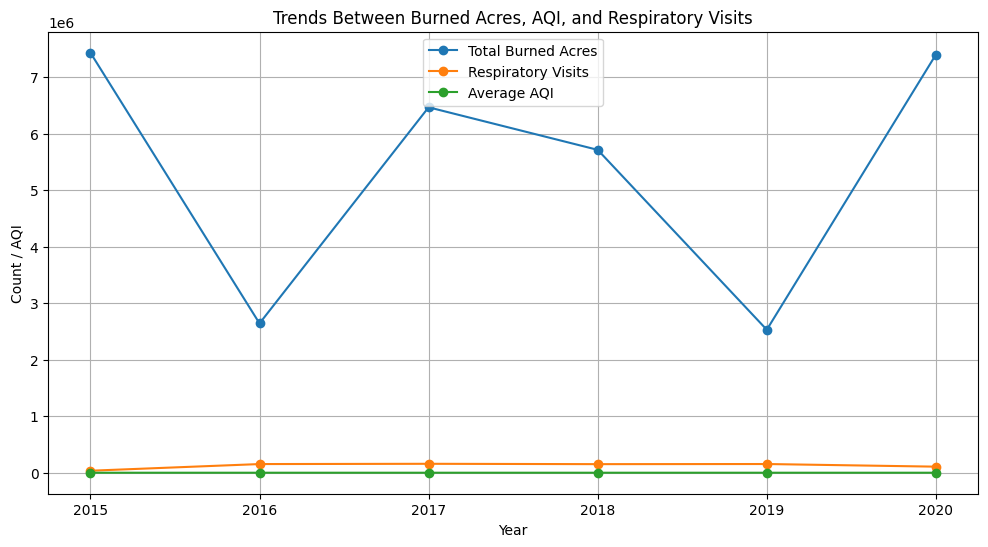

In [23]:
plt.figure(figsize=(12,6))
plt.plot(combined_data['Year'], combined_data['Total_Burned_Acres'], label='Total Burned Acres', marker='o')
plt.plot(combined_data['Year'], combined_data['Respiratory_Visits'], label='Respiratory Visits', marker='o')
plt.plot(combined_data['Year'], combined_data['Average_AQI'], label='Average AQI', marker='o')
plt.title('Trends Between Burned Acres, AQI, and Respiratory Visits')
plt.xlabel('Year')
plt.ylabel('Count / AQI')
plt.legend()
plt.grid()
plt.show()

In [24]:
correlation_matrix = combined_data[['Total_Burned_Acres', 'Respiratory_Visits', 'Average_AQI']].corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                    Total_Burned_Acres  Respiratory_Visits  Average_AQI
Total_Burned_Acres            1.000000           -0.614027     0.825839
Respiratory_Visits           -0.614027            1.000000    -0.144611
Average_AQI                   0.825839           -0.144611     1.000000


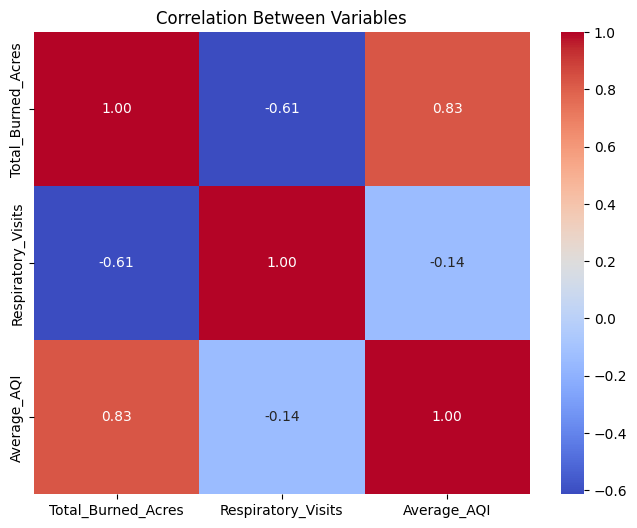

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.show()

In [35]:
from scipy.stats import pearsonr

correlation_results = combined_data.drop(columns=['Year']).corr(method='pearson')

print('Correlation Matrix:')
print(correlation_results)

Correlation Matrix:
                    Total_Burned_Acres  Respiratory_Visits  Average_AQI
Total_Burned_Acres            1.000000           -0.614027     0.825839
Respiratory_Visits           -0.614027            1.000000    -0.144611
Average_AQI                   0.825839           -0.144611     1.000000


In [39]:
corr_acres_visit, p_acres_visits = pearsonr(combined_data['Total_Burned_Acres'], combined_data['Respiratory_Visits'])
corr_aqi_visits, p_aqi_visits = pearsonr(combined_data['Average_AQI'], combined_data['Respiratory_Visits'])
corr_acres_aqi, p_acres_aqi = pearsonr(combined_data['Total_Burned_Acres'], combined_data['Average_AQI'])

print(f"Correlation between Total_Burned_Acres and Respiratory_Visits: {corr_acres_visit:.2f} (p-value: {p_acres_visits:.2e})")
print(f"Correlation between Average_AQI and Respiratory_Visits: {corr_aqi_visits:.2f} (p-value: {p_aqi_visits:.2e})")
print(f"Correlation between Total_Burned_Acres and Average_AQI: {corr_acres_aqi:.2f} (p-value: {p_acres_aqi:.2e})")

Correlation between Total_Burned_Acres and Respiratory_Visits: -0.61 (p-value: 1.95e-01)
Correlation between Average_AQI and Respiratory_Visits: -0.14 (p-value: 7.85e-01)
Correlation between Total_Burned_Acres and Average_AQI: 0.83 (p-value: 4.29e-02)


Text(0, 0.5, 'Respiratory Visits')

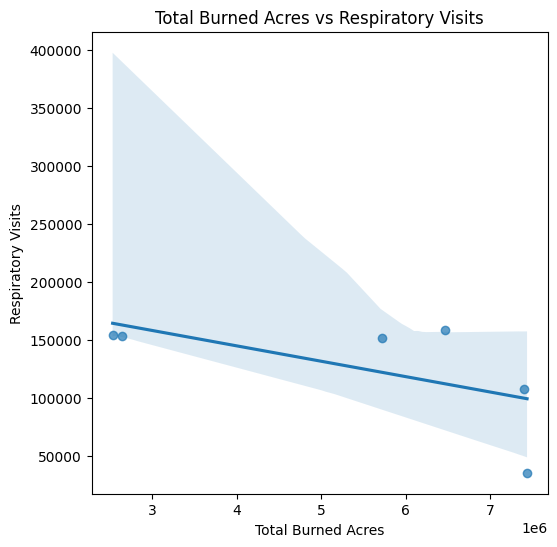

In [46]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.regplot(x='Total_Burned_Acres', y='Respiratory_Visits', data=combined_data, scatter_kws={'alpha': 0.7})
plt.title("Total Burned Acres vs Respiratory Visits")
plt.xlabel("Total Burned Acres")
plt.ylabel("Respiratory Visits")

In [42]:
combined_data

,Year,Total_Burned_Acres,Respiratory_Visits,Average_AQI
0,2015,7.436170e+06,35312,7.662524
1,2016,2.643830e+06,153248,5.689799
2,2017,6.469841e+06,158052,9.189842
3,2018,5.716486e+06,151856,9.733006
4,2019,2.531497e+06,154028,5.398337
5,2020,7.402439e+06,107372,11.074513


In [30]:
from scipy.stats import ttest_ind

smoke_years = combined_data[combined_data['Average_AQI'] > 100]
non_smoke_years = combined_data[combined_data['Average_AQI'] <= 100]

# Extract respiratory visits for smoke and non-smoke years
smoke_visits = smoke_years['Respiratory_Visits']
non_smoke_visits = non_smoke_years['Respiratory_Visits']

# Perform the T-Test
t_stat, p_value = ttest_ind(smoke_visits, non_smoke_visits, equal_var=False)  # Welch's T-Test

# Output Results
print(f"T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in hospital visits between smoke and non-smoke years.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in hospital visits between smoke and non-smoke years.")

T-Test Results:
T-Statistic: nan
P-Value: nan
Result: Fail to reject the null hypothesis. No significant difference in hospital visits between smoke and non-smoke years.


In [28]:
! pip3 install scipy

,SEQ_NO,STAYTYPE,ZIPCODE3,AGEGROUP,SEX,AWEEKEND,DIS_YR,LOS,ADM_TYPE,ADM_SRC,STATUS,CHARGES1,PAYER1,DIAG,POA,PROC,ECODE,POAE
0,2021000011,1,983.0,3.0,M,1.0,2021,6.0,3,2,61.0,14000.0,1,J18,Y,NaN,NaN,NaN
1,2021000045,1,982.0,3.0,F,1.0,2021,3.0,3,9,1.0,10000.0,1,J96,Y,NaN,NaN,NaN
2,2021000127,1,982.0,3.0,F,0.0,2021,2.0,3,6,7.0,17000.0,1,J69,Y,NaN,NaN,NaN
3,2021000148,1,982.0,3.0,M,0.0,2021,7.0,1,6,6.0,22000.0,1,J18,Y,NaN,NaN,NaN
4,2021000518,1,982.0,3.0,M,0.0,2021,2.0,1,2,50.0,14000.0,1,J96,Y,NaN,NaN,NaN
